In [3]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

import warnings
import joblib
import pydotplus
from skompiler import skompile


pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=Warning)


In [7]:
df = pd.read_csv(r"C:\Users\MONSTER\Desktop\dataset\NIJ_s_Recidivism_Full_Dataset_with_Predicted.csv")

In [5]:
df.head()

,ID,Gender,Race,Age_at_Release,Gang_Affiliated,Supervision_Risk_Score_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Num_Distinct_Arrest_Crime_Types,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Num_Distinct_Conviction_Crime_Types,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Violations_Instruction,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,Num_Drugs_Used,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Training_Sample,Predicted_Recidivism_Within_3years
0,1,M,BLACK,43-47,False,3.0,At least some college,3 or more,Drug,More than 3 years,6,False,False,4,False,False,False,False,True,True,False,0,6,0,2,232.577285,0,0.488562,0.447610,False,False,False,1,False
1,2,M,BLACK,33-37,False,6.0,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,True,False,8,True,True,True,False,False,False,True,4 or more,0,0,2,35.666667,0,0.425234,2.000000,False,True,False,1,True
2,3,M,BLACK,48 or older,False,7.0,At least some college,3 or more,Drug,1-2 years,7,True,False,6,False,True,False,False,True,True,True,4 or more,6,0,0,93.666667,2,0.000000,0.000000,False,True,False,1,False
3,4,M,WHITE,38-42,False,7.0,Less than HS diploma,1,Property,1-2 years,6,False,False,4,False,False,False,True,True,True,False,0,6,0,3 or more,25.400000,0,1.000000,0.718996,False,False,False,1,False
4,5,M,WHITE,33-37,False,4.0,Less than HS diploma,3 or more,Violent/Non-Sex,1-2 years,7,True,False,5,False,False,False,False,True,True,False,0,7,0,0,23.117647,1,0.203562,0.929389,False,True,True,1,True


In [99]:
df["Age_at_Release"].value_counts()

Age_at_Release
23-27          5176
28-32          4982
33-37          4271
48 or older    3727
38-42          2993
43-47          2620
18-22          2066
Name: count, dtype: int64

In [ ]:
df["Predicted_Recidivism_Within_3years"].value_counts()

In [23]:
print(df.groupby('Recidivism_Arrest_Year1')['Predicted_Recidivism_Within_3years'].value_counts(0))

Recidivism_Arrest_Year1  Predicted_Recidivism_Within_3years
False                    False                                 12270
                         True                                   5841
True                     True                                   7724
Name: count, dtype: int64


In [27]:
proportion = df.groupby('Recidivism_Arrest_Year1')['Predicted_Recidivism_Within_3years'].value_counts(normalize=True).unstack().fillna(0) * 100
print(proportion)


Predicted_Recidivism_Within_3years      False       True 
Recidivism_Arrest_Year1                                  
False                               67.748882   32.251118
True                                 0.000000  100.000000


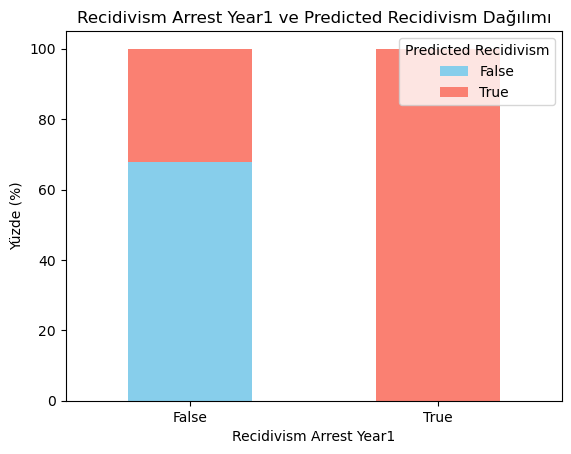

In [29]:


proportion.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Recidivism Arrest Year1 ve Predicted Recidivism Dağılımı')
plt.ylabel('Yüzde (%)')
plt.xlabel('Recidivism Arrest Year1')
plt.legend(title='Predicted Recidivism')
plt.xticks(rotation=0)
plt.show()


In [33]:
df[df['Predicted_Recidivism_Within_3years'] == True]['Gender'].value_counts()


Gender
M    12268
F     1297
Name: count, dtype: int64

In [49]:
df[df['Predicted_Recidivism_Within_3years'] == True]['Race'].value_counts()


Race
BLACK    7957
WHITE    5608
Name: count, dtype: int64

In [37]:
df[df['Predicted_Recidivism_Within_3years'] == True]['Gang_Affiliated'].value_counts()


Gang_Affiliated
False    8805
True     4760
Name: count, dtype: int64

In [39]:
df['Gang_Affiliated'].value_counts()


Gang_Affiliated
False    19820
True      6015
Name: count, dtype: int64

In [51]:
# Ortalama skorlar
df.groupby('Predicted_Recidivism_Within_3years')['Supervision_Risk_Score_First'].mean()



Predicted_Recidivism_Within_3years
False    5.427710
True     6.666347
Name: Supervision_Risk_Score_First, dtype: float64

In [53]:
count = df[df['Supervision_Risk_Score_First'] >= 6].shape[0]
print(f"Supervision Risk Score 6 ve üzeri kişi sayısı: {count}")


Supervision Risk Score 6 ve üzeri kişi sayısı: 15311


In [55]:
df.groupby('Predicted_Recidivism_Within_3years')['Percent_Days_Employed'].describe()


,count,mean,std,min,25%,50%,75%,max
Predicted_Recidivism_Within_3years,,,,,,,,
False,12270.0,0.642313,0.407305,0.0,0.127874,0.844614,1.000000,1.0
True,13565.0,0.341829,0.381365,0.0,0.000000,0.178571,0.677233,1.0


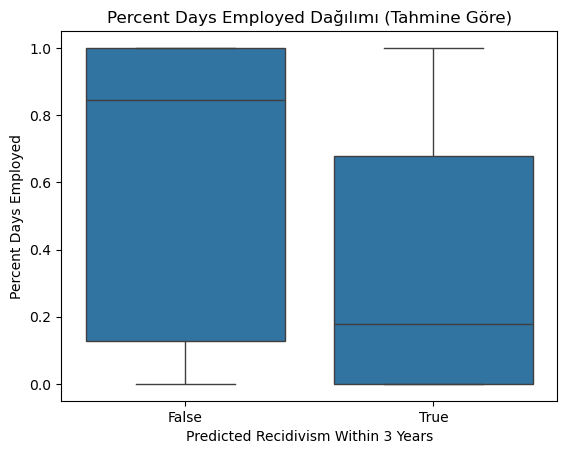

In [57]:


sns.boxplot(x='Predicted_Recidivism_Within_3years', y='Percent_Days_Employed', data=df)
plt.title('Percent Days Employed Dağılımı (Tahmine Göre)')
plt.xlabel('Predicted Recidivism Within 3 Years')
plt.ylabel('Percent Days Employed')
plt.show()


In [61]:
df.groupby('Predicted_Recidivism_Within_3years')['Jobs_Per_Year'].agg(['mean', 'median', 'std'])


,mean,median,std
Predicted_Recidivism_Within_3years,,,
False,0.959721,0.791441,0.868325
True,0.692914,0.530116,0.809648


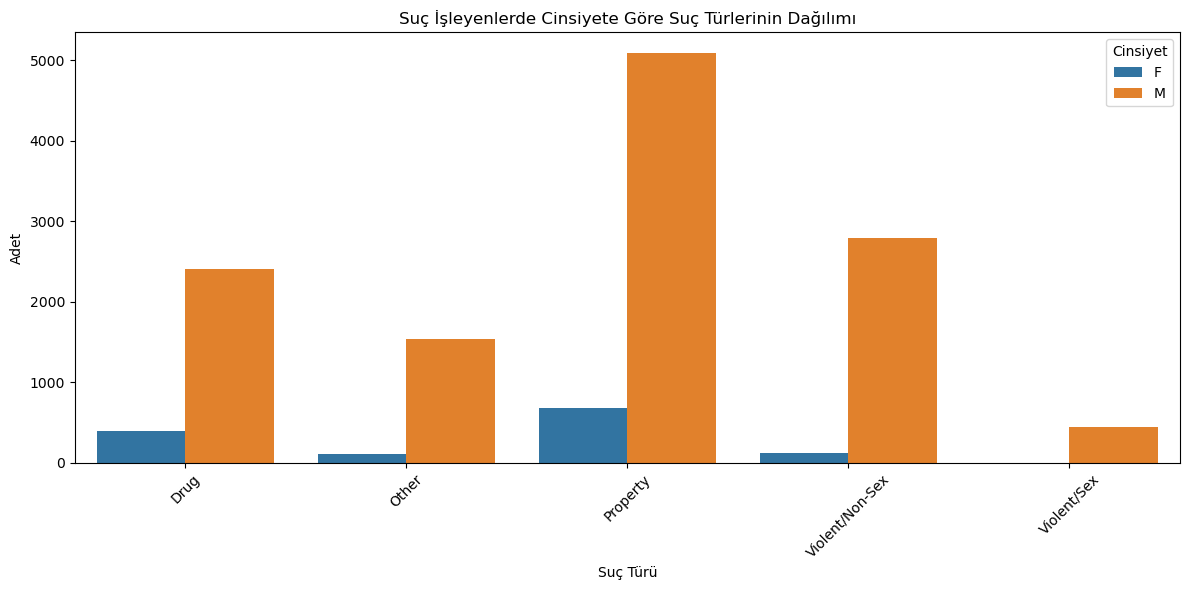

In [13]:
gang_true = df[df['Predicted_Recidivism_Within_3years'] == True]
counts = gang_true.groupby(['Gender', 'Prison_Offense']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=counts, x='Prison_Offense', y='Count', hue='Gender')


plt.title('Suç İşleyenlerde Cinsiyete Göre Suç Türlerinin Dağılımı')
plt.xlabel('Suç Türü')
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.legend(title='Cinsiyet')
plt.tight_layout()


plt.savefig("suclu_cinsiyet_dagilimi2.png", dpi=300, bbox_inches='tight') 



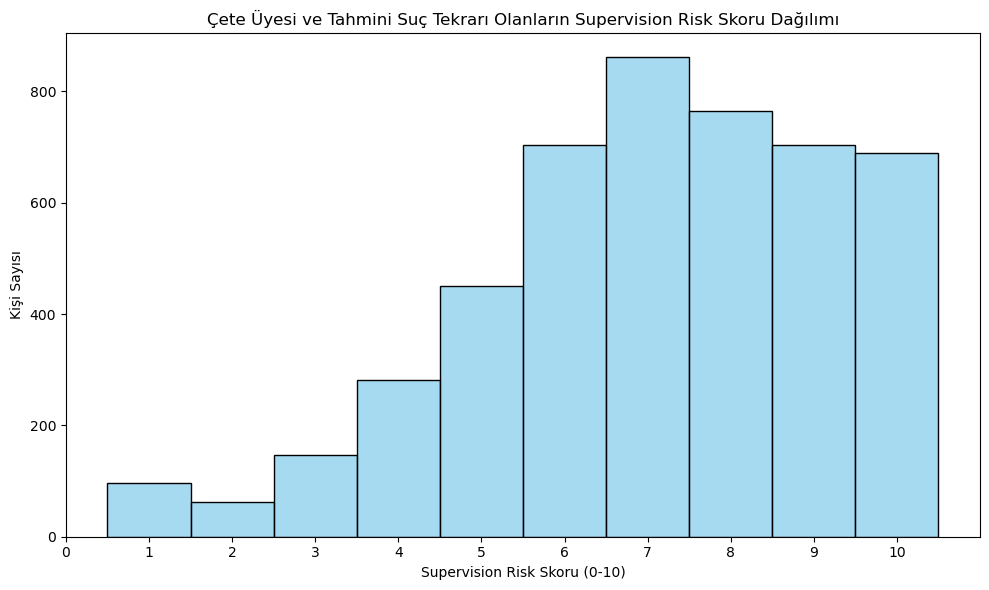

In [37]:
risk_group = df[(df['Predicted_Recidivism_Within_3years'] == True) & (df['Gang_Affiliated'] == True)]


bins = list(range(0, 12))  # 0'dan 11'e kadar

plt.figure(figsize=(10,6))
sns.histplot(risk_group['Supervision_Risk_Score_First'], bins=bins, kde=False, color='skyblue', discrete=True)

plt.title('Çete Üyesi ve Tahmini Suç Tekrarı Olanların Supervision Risk Skoru Dağılımı')
plt.xlabel('Supervision Risk Skoru (0-10)')
plt.ylabel('Kişi Sayısı')
plt.xticks(range(0, 11))
plt.tight_layout()

plt.savefig("risk_skoru_dagilimi.png", dpi=300, bbox_inches='tight')
plt.show()


In [25]:
count_5 = risk_group[risk_group['Supervision_Risk_Score_First'] == 5].shape[0]

print(f"Risk skoru 5 olan çete üyesi ve tahmini suç tekrarı True olan kişi sayısı: {count_5}")


Risk skoru 5 olan çete üyesi ve tahmini suç tekrarı True olan kişi sayısı: 450


In [67]:
gang_true = df[(df['Predicted_Recidivism_Within_3years'] == True)]

gang_true.groupby('Gang_Affiliated')[['Jobs_Per_Year', 'Percent_Days_Employed']].mean()


,Jobs_Per_Year,Percent_Days_Employed
Gang_Affiliated,,
False,0.714855,0.342930
True,0.652328,0.339794


In [69]:
subset = df[(df['Predicted_Recidivism_Within_3years'] == True) & (df['Gang_Affiliated'] == True)]
offense_counts = subset['Prison_Offense'].value_counts()
offense_percents = subset['Prison_Offense'].value_counts(normalize=True) * 100

print(offense_counts)
print(offense_percents)


Prison_Offense
Property           1960
Violent/Non-Sex    1339
Drug                851
Other               552
Violent/Sex          58
Name: count, dtype: int64
Prison_Offense
Property           41.176471
Violent/Non-Sex    28.130252
Drug               17.878151
Other              11.596639
Violent/Sex         1.218487
Name: proportion, dtype: float64


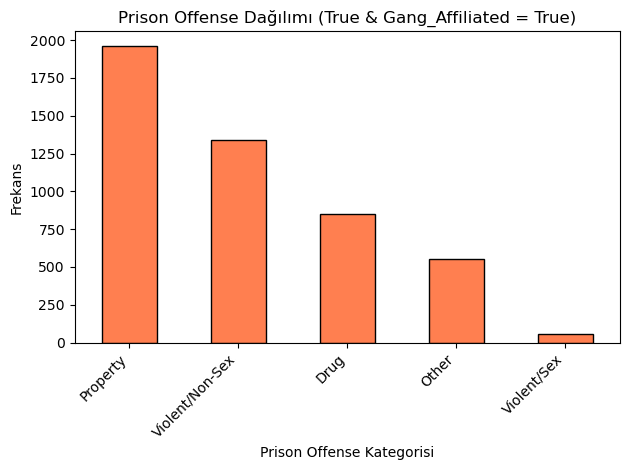

In [71]:


offense_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Prison Offense Dağılımı (True & Gang_Affiliated = True)')
plt.xlabel('Prison Offense Kategorisi')
plt.ylabel('Frekans')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [77]:
subset = df[(df['Predicted_Recidivism_Within_3years'] == True) & (df['Gang_Affiliated'] == True)]

age_offense_ct = pd.crosstab(subset['Prison_Offense'], subset['Age_at_Release'], normalize='index') * 100

print(age_offense_ct)


Age_at_Release       18-22      23-27      28-32      33-37      38-42  \
Prison_Offense                                                           
Drug              8.578143  23.619271  25.499412  19.506463  10.810811   
Other            16.485507  29.710145  25.905797  15.942029   6.159420   
Property         16.326531  30.714286  18.163265  13.979592   9.744898   
Violent/Non-Sex  20.238984  39.955190  20.388350  10.007468   5.899925   
Violent/Sex      18.965517  34.482759  22.413793  17.241379   5.172414   

Age_at_Release      43-47  48 or older  
Prison_Offense                          
Drug             7.050529     4.935370  
Other            3.623188     2.173913  
Property         6.071429     5.000000  
Violent/Non-Sex  2.315161     1.194922  
Violent/Sex      0.000000     1.724138  


<Figure size 1000x600 with 0 Axes>

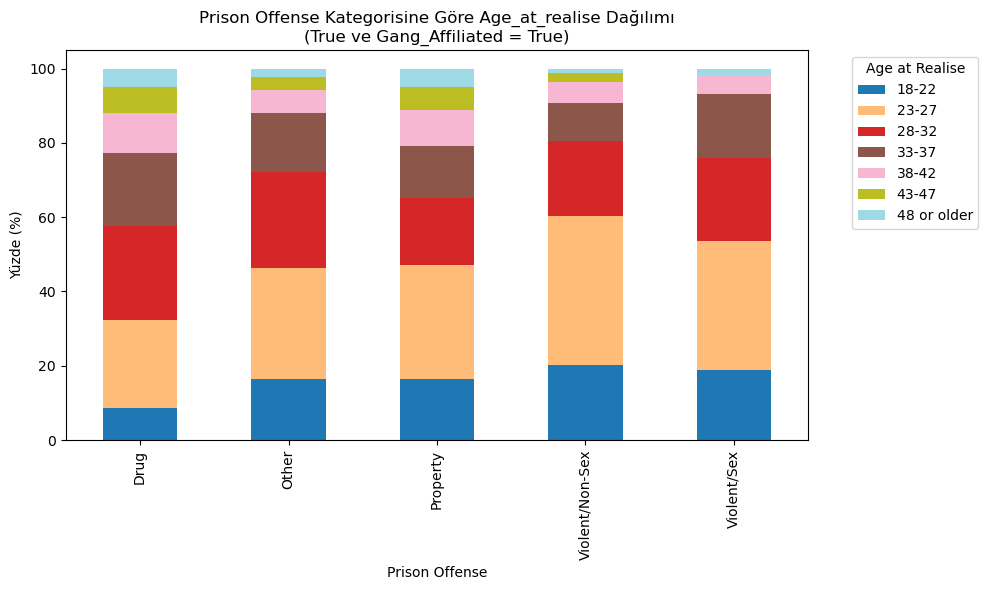

In [79]:

plt.figure(figsize=(10,6))
age_offense_ct.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10,6))
plt.title('Prison Offense Kategorisine Göre Age_at_realise Dağılımı\n(True ve Gang_Affiliated = True)')
plt.xlabel('Prison Offense')
plt.ylabel('Yüzde (%)')
plt.legend(title='Age at Realise', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [83]:
df.groupby(['Predicted_Recidivism_Within_3years', 'Gang_Affiliated'])[['Avg_Days_per_DrugTest', 'Num_Drugs_Used']].mean()

Avg_Days_per_DrugTest  \
Predicted_Recidivism_Within_3years Gang_Affiliated                          
False                              False                        72.847512   
                                   True                         67.541892   
True                               False                        78.863456   
                                   True                         69.320435   

                                                    Num_Drugs_Used  
Predicted_Recidivism_Within_3years Gang_Affiliated                  
False                              False                  0.356241  
                                   True                   0.265339  
True                               False                  0.551391  
                                   True                   0.605042

In [91]:
subset_true = df[
    (df['Predicted_Recidivism_Within_3years'] == True) & 
    (df['Gang_Affiliated'] == True) & 
    (df['Age_at_Release'] == '23-27')
]

avg_days = subset_true['Avg_Days_per_DrugTest'].mean()
num_drugs = subset_true['Num_Drugs_Used'].mean()

print(f"23-27 yaş arası, tahmini suçlu ve çete üyesi olanlarda ortalama test aralığı: {avg_days:.2f} gün")
print(f"23-27 yaş arası, tahmini suçlu ve çete üyesi olanlarda ortalama uyuşturucu çeşit sayısı: {num_drugs:}")


23-27 yaş arası, tahmini suçlu ve çete üyesi olanlarda ortalama test aralığı: 67.35 gün
23-27 yaş arası, tahmini suçlu ve çete üyesi olanlarda ortalama uyuşturucu çeşit sayısı: 0.6787122207621551


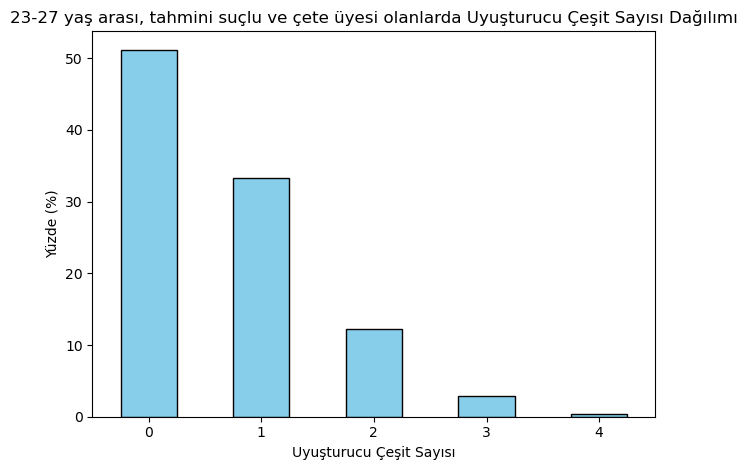

In [93]:


drug_number_percents.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('23-27 yaş arası, tahmini suçlu ve çete üyesi olanlarda Uyuşturucu Çeşit Sayısı Dağılımı')
plt.xlabel('Uyuşturucu Çeşit Sayısı')
plt.ylabel('Yüzde (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [95]:
subset_true = df[(df['Predicted_Recidivism_Within_3years'] == True)]

score_23_27 = subset_true[subset_true['Age_at_Release'] == '23-27']['Supervision_Risk_Score_First'].mean()
score_28_32 = subset_true[subset_true['Age_at_Release'] == '28-32']['Supervision_Risk_Score_First'].mean()

print(f"23-27 yaş arası için ortalama Supervision Risk Skoru: {score_23_27:.2f}")
print(f"28-32 yaş arası için ortalama Supervision Risk Skoru: {score_28_32:.2f}")


23-27 yaş arası için ortalama Supervision Risk Skoru: 7.45
28-32 yaş arası için ortalama Supervision Risk Skoru: 6.93


In [97]:
ages = ['23-27', '28-32']
subset_true = df[(df['Predicted_Recidivism_Within_3years'] == True) & (df['Age_at_Release'].isin(ages))]

result = subset_true.groupby('Age_at_Release')['Supervision_Risk_Score_First'].agg(['mean', 'count'])

print(result)


                    mean  count
Age_at_Release                 
23-27           7.451711   3303
28-32           6.931826   2875


In [101]:
ages = ['23-27', '28-32']
subset_ages = df[df['Age_at_Release'].isin(ages)]

mean_scores = subset_ages.groupby('Age_at_Release')['Supervision_Risk_Score_First'].mean()

print(mean_scores)
#bu da modelimizi doğrular nitelikte iş önerilermizi bu gruba göre yapmalıyız.

Age_at_Release
23-27    7.239181
28-32    6.701525
Name: Supervision_Risk_Score_First, dtype: float64
